Names: Mandus Aldag, Alexandros Mylonas

In [1]:
# Cell 1 
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# for your convenience define 
mu_t = 0 
mu_x = 1

## Exercise 7.1 The Wilson Gauge Action

In [19]:
def g_plaquette(config, mu, nu):
    return config[:,:,mu]*np.roll(config[:,:,nu],shift=1, axis=mu)*np.roll(config[:,:,mu],shift=1, axis=nu).conj()*np.conj(config[:,:,nu])

In [3]:
# Cell 3
np.random.seed(1234) # this call is local to this cell do not change the seed!!!

# generage a random configuration for Nt = Nx = 3
test_gauge = np.exp(1j*np.random.randn(3,3,2)) 

print(np.sum(g_plaquette(test_gauge,mu_t,mu_t))) # (9-2.5673907444456745e-16j)
print(np.sum(g_plaquette(test_gauge,mu_t,mu_x))) # (0.7952904825671003+4.232164745727907j)
print(np.sum(g_plaquette(test_gauge,mu_x,mu_x))) # (9+3.252606517456513e-17j)
print(np.sum(g_plaquette(test_gauge,mu_x,mu_t))) # (0.795290482567101-4.232164745727906j)

(9+2.0977062647180296e-17j)
(0.7952904825671008+4.232164745727907j)
(9+4.222396193121513e-17j)
(0.7952904825671008-4.232164745727907j)


The results are very similar but not exact. Especially the imaginary part deviates.

In [4]:

def g_action(beta, config):
    plaq = np.sum(np.real(1-g_plaquette(config, mu_t, mu_x)))
    return 2*beta * plaq

In [5]:
# Cell 5
print(g_action(1,test_gauge)) # 16.4094190348658

16.4094190348658


To check that your code is sufficiently fast, benchmark it in the following cell. 
You should obtain timings of a similar order as

* 30.7 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

In [20]:
%%timeit
# Cell 6
g_action(1/3,test_gauge)

11.7 µs ± 44.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Exercise 7.2 

The expectation value of $O[\Phi]$ under the measure defined by $e^{-S[\Phi]}$ is given by:
$$\langle{O}\rangle_{\Phi}=\frac{\int{O}[\Phi]e^{-S[\Phi]}{\cal D}[\Phi]}{\int e^{-S[\Phi]}{\cal D}[\Phi]}$$
We extend the configuration space by introducing an auxiliary momentum variable $\pi$ and define the Hamiltonian ${\mathcal{H}}[\Phi,\pi]$ such that it reproduces the original distribution over $\Phi$. This can be done with:
$$\mathcal{H}[\Phi,\pi]=S[\Phi]+\frac{1}{2}\pi^{2}$$
The corresponding distribution in the extended space is then:
$$e^{-\mathcal{H}[\Phi,\pi]}= e^{-S[\Phi]}e^{-\frac{1}{2}\pi^{2}}$$
If we marginalize over $\pi$, we should recover the original distribution in terms of $S[\Phi]$. Specifically:
$$\int e^{-\mathcal{H}[\Phi,\pi]}D[\pi]=\int e^{-S[\Phi]}e^{-\frac{1}{2}\pi^{2}}D[\pi]\propto e^{-S[\Phi]}$$
The proportionality constant does not depend on  $\Phi$, as it comes solely from the normalization of the Gaussian integral over $\pi$. Thus, integrating out $\pi$ leaves the original measure $e^{-S[\Phi]}{\mathcal{D}}[\Phi]$ intact.
The expectation value $\langle O\rangle_{\Phi,\pi}$ in the extended space is defined as:
$$\langle{O}\rangle_{\Phi,\pi}=\frac{\int{O}[\Phi]e^{-\cal H[\Phi,\pi]}{\cal D}[\Phi]{\cal D}[\pi]}{\int e^{-\cal H[\Phi,\pi]}{\cal D}\Phi]{\cal D}[\pi]}$$
Since $O[\Phi]$ does not depend on $\pi$, the $\pi$-integral acts only on the Gaussian factor and as shown previously, this integration rescales both the numerator and denominator by the same constant factor. So, the expectation value $\langle O\rangle_{\Phi,\pi}$ reduces to:
$$\langle{O}\rangle_{\Phi,\pi}=\frac{\int{O}[\Phi]e^{-S[\Phi]}{\mathcal D}[\Phi]}{\int e^{-S[\Phi]}{\mathcal D}[\Phi]}=\langle{O}\rangle_{\Phi}$$

# Exercise 7.3 

The Hamiltonian for lattice gauge theory is given by:
$$\mathcal{H}(U,\pi)=\frac{1}{2}\sum_{{\bf n},\mu}\mathrm{Tr}[\pi_{\mu}({\bf n})^{2}]-\beta\sum_{{\bf n},\mu\lt \nu}\mathrm{Re}[\mathrm{Tr}(U_{\mu\nu}({\bf n}))]$$
For simplicity, we focus on the term in the Hamiltonian that depends on the link variable $U_{\mu}(\mathbf{n})$, which is:
$$\mathcal{H}_{U}=-\beta\sum_{{\bf n},\mu\lt \nu}{\bf R e}[\mathrm{Tr}(U_{\mu\nu}({\bf n}))].$$
The plaquette $U_{\mu \nu}(\mathbf{n})$ involves $U_{\mu}(\mathbf{n})$ when $\mu$ is part of the plaquette. Explicitly, $U_{\mu \nu}(\mathbf{n})$ is given by:
$$U_{\mu\nu}({\bf n})=U_{\mu}({\bf n})U_{\nu}({\bf n}+\hat{\mu})U_{\mu}^{\dagger}({\bf n}+\hat{\nu})U_{\nu}^{\dagger}({\bf n})$$
and the contribution of $U_{\mu}(\mathbf{n})$ to $\mathcal{H}_{U}$ comes from the plaquettes containing $U_{\mu}(\mathbf{n})$.
The force is defined as the derivative of the Hamiltonian with respect to $U_{\mu}(\mathbf{n})$:
$$F_{\mu}({\bf n})=\frac{\partial\mathcal{H}}{\partial U_{\mu}({\bf n})}$$
Focusing on the relevant part $\mathcal{H}_{U}$, we write:
$${\frac{\partial H_{U}}{\partial U_{\mu}({\bf n})}}=\beta\sum_{\nu\neq\mu}{\frac{\partial}{\partial U_{\mu}({\bf n})}}\mathrm{Re}[\mathrm{Tr}(U_{\mu\nu}({\bf n}))].$$
Since $\operatorname{Re}[\operatorname{Tr}(A)]={\textstyle{\frac{1}{2}}}(\operatorname{Tr}(A)+\operatorname{Tr}(A^{\dagger}))$ the derivative becomes:
$$\frac{\partial}{\partial U_{\mu}({\bf n})}\mathrm{Re}[\mathrm{Tr}(U_{\mu\nu}({\bf n}))]=\mathrm{Im}[\frac{\partial}{\partial U_{\mu}({\bf n})}\mathrm{Tr}(U_{\mu\nu}({\bf n}))].$$
Substitute the explicit form of $U_{\mu \nu}(\mathbf{n})$:
$$U_{\mu\nu}({\bf n})=U_{\mu}({\bf n})\cdot K_{\mu}({\bf n})$$
where $K_{\mu}({\bf n})$ is the remaining part of the plaquette, given by:
$$K_{\mu}({\bf n})=U_{\nu}({\bf n}+\hat{\mu})\cdot U_{\mu}^{\dagger}({\bf n}+\hat{\nu})\cdot U_{\nu}^{\dagger}({\bf n})\cdot U_{\nu}^{\dagger}({\bf n}+\hat{\mu}-\hat{\nu})\cdot U_{\mu}^{\dagger}({\bf n}-\hat{\nu})\cdot U_{\nu}({\bf n}-\hat{\nu})\Big|_{\nu\ne\mu}$$
Differentiating ${\mathrm{Tr}}(U_{\mu\nu}(\mathbf{m}))$ with respect to $U_{\mu}(\mathbf{n})$, with $U_{\mu}(\mathbf{n})$ being unitary $(U_{\mu}^{\dagger}U_{\mu}=1),$ we have:
$$\frac{\partial}{\partial U_{\mu}({\bf n})}\mathrm{Tr}(U_{\mu\nu}({\bf n}))=K_{\mu}({\bf n}).$$
Substituting this result back into the force expression, we get our final result:
$$F_{\mu}({\bf n})=-2\beta\,\mathrm{Im}[U_{\mu}({\bf n})K_{\mu}({\bf n})]$$

In [6]:
# Cell 7
def g_staple(config,mu):
    # This staple caluclation relies on the fact that we are working in a two dimensional system
    # if you compare this to the 4 dimesnional form of the past two weeks you see that the sum over directions
    # reduces the the if mu \neq nu statement.
    # This functions thus returns {K_\mu(n)}_{n\in Lattice}
    if mu == mu_t:
        return ( np.roll(config[:,:,mu_x],shift=1,axis=mu_t) \
                * np.roll(config[:,:,mu_t],shift=1,axis=mu_x).conj() \
                * config[:,:,mu_x].conj() ) \
            +   ( np.roll(config[:,:,mu_x],shift=(1,-1),axis=(mu_t,mu_x)).conj() \
                * np.roll(config[:,:,mu_t],shift=-1,axis=mu_x).conj() \
                * np.roll(config[:,:,mu_x],shift=-1,axis=mu_x))
    else:
        return ( np.roll(config[:,:,mu_t],shift=1,axis=mu_x) \
                * np.roll(config[:,:,mu_x],shift=1,axis=mu_t).conj() \
                * config[:,:,mu_t].conj() ) \
            +   ( np.roll(config[:,:,mu_t],shift=(-1,1),axis=(mu_t,mu_x)).conj() \
                * np.roll(config[:,:,mu_x],shift=-1,axis=mu_t).conj() \
                * np.roll(config[:,:,mu_t],shift=-1,axis=mu_t))
    
def g_force(beta,config):
    f = np.zeros(shape=config.shape)
    f[:,:,mu_t] = (config[:,:,mu_t] * g_staple(config,mu_t)).imag
    f[:,:,mu_x] = (config[:,:,mu_x] * g_staple(config,mu_x)).imag 
    return -2*beta*f

def g_hamilton(beta,U,pi):
    return 0.5*np.sum(pi*pi) + g_action(beta,U)

<!---
The MCMC method requires to fulfil the balance equation to ensure that the entire phase space can be covered, that is that there are no sources nor sinks. 
This is sufficiently satisfied once detailed balance 

\begin{equation}
T(U^*, U) P(U) = T(U,U^*) P(U^*)
\end{equation}
is apparent. 
First, note that the transition probability of the HMC is given by 
\begin{equation}
    T(U,U^*) = \int \int T_A\left((U^*,\pi^*),(U,\pi)\right) \cdot T_{md}\left((U^*,\pi^*),(U,\pi)\right) e^{-\frac{1}{2}\pi^2} \mathcal{D}\left[\pi\right]\mathcal{D}\left[\pi^*\right]
\end{equation}
where $T_{md}\left((U^*,\pi^*),(U,\pi)\right)$ describes the transition probability of the leapfrog and 
$$
    T_A\left((U^*,\pi^*),(U,\pi)\right) = \text{min}\left\{ 1, e^{\mathcal{H}\left[U,\pi\right] - \mathcal{H}\left[U^*,\pi^*\right]} \right\}
$$
the accept reject probability. 
On can show that $T_{md}$ is __area preserving and reversible__. 
This is required for the detailed balance condition.
For a more detailed discussion on this have a look in e.g. Gattringer & Lang, Quantumchromodynamics on the Lattice, Section 8.2.
-->
To integrate the EoM, we use a symplectic integrator as discussed in the lecture, here the so-called leapfrog. 
The standard algorithm for position `q` and momentum `p` proceeds as follows
```
    MD_step_size = MD_direction * MD_trajectory_length/MD_steps
    p = init_p
    q = init_q + MD_step_size/2 * p

    for _ in range(1,MD_steps-1):
        p += MD_step_size * force(q)
        q += MD_step_size * p

    p += MD_step_size*g_force(beta,U).real
    q += MD_step_size/2 * p
    
    return q,p
```


#### Exercise 7.4 Leapfrog within Gauge Group
Recreate the leapfrog algorithm for the evolution of gauge fields. Steps that might help

1. Identify positions with gauge filed `U = q`
2. Identify momentum with momentum field `pi = p`
3. Think about how gauge links can be updated to stay in the group

#### 7.5 Leapfrog Algorithm Implementation
Implement the algorithm you just derived

In [ ]:

# =============================================================================================================
def g_leapfrog(beta,init_gauge = None,init_pi = None,MD_steps=10,MD_trajectory_length=1, MD_direction = 1):

    # Compute the step size
    MD_step_size = MD_direction*MD_trajectory_length/MD_steps
    # make a deep copy of the input fields
    pi = init_pi.copy()
    U = init_gauge.copy()
    
    # initial half step
    pi += 0.5*MD_step_size*g_force(beta,U)
    for _ in range(1,MD_steps):
        # full steps'
        U += MD_step_size*pi
        if _ < MD_steps-1:
            pi += MD_step_size*g_force(beta,U)
    

    # final half steps
    pi+= MD_step_size/2*g_force(beta,U)
    return U,pi
# =============================================================================================================

In [14]:
# Test your code here:
np.random.seed(1234)
U,pi = g_leapfrog(1/3,test_gauge,np.random.randn(3,3,2))

print(f"np.sum(U) = {np.sum(U)}") # (2.2847013993188163+4.9444414069908875j)
print(f"np.sum(\u03C0) = {np.sum(pi)}") # -0.00019751806219858725

np.sum(U) = (10.489277305437103+1.7387124221778907j)
np.sum(π) = -0.00019751806219625578


Something is off here for the U. Something must have went wrong in the implementation of the leapfrog algorithm.

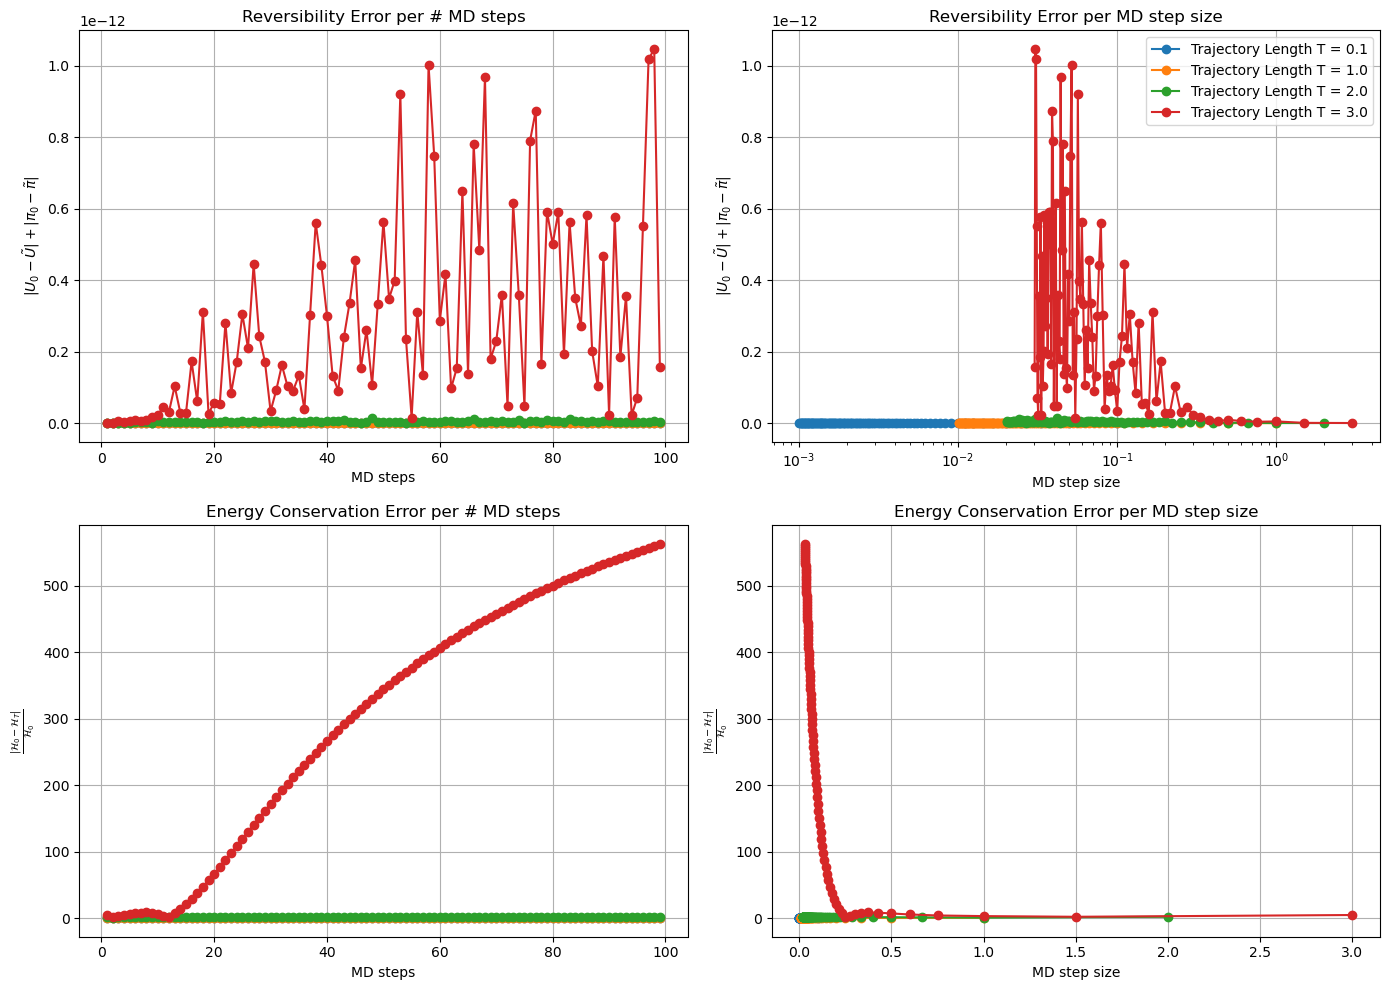

CPU times: user 2.28 s, sys: 14 ms, total: 2.29 s
Wall time: 2.29 s


In [15]:
%%time
np.random.seed(1234)
MD_traj_lengths = np.array([0.1,1.0,2.0,3.0])
MD_steps   = np.arange(1,100)

init_gauge = test_gauge
init_pi = np.random.normal(0,1/3,size=(3,3,2))

initial_energy = g_hamilton(1/3,init_gauge,init_pi)

errors_energy_conservation = np.zeros(shape=(len(MD_steps),len(MD_traj_lengths)))
errors_reversibility = np.zeros(shape=(len(MD_steps),len(MD_traj_lengths)))

for (Ts_i,Ts),(T_i,T) in it.product(enumerate(MD_steps),enumerate(MD_traj_lengths)):

    U,pi = g_leapfrog(
        beta = 1/3,
        init_gauge = init_gauge,
        init_pi = init_pi,
        MD_steps = Ts, 
        MD_trajectory_length = T, 
        MD_direction = 1
    )
    
    errors_energy_conservation[Ts_i,T_i] = np.abs( initial_energy - g_hamilton(1/3,U,pi) ) / initial_energy

    U_back,pi_back = g_leapfrog(
        beta = 1/3,
        init_gauge = U,
        init_pi = pi,
        MD_steps = Ts, 
        MD_trajectory_length = T, 
        MD_direction = -1
    )
    
    errors_reversibility[Ts_i,T_i] = np.sqrt(np.sum(pow(np.abs(U_back - init_gauge),2))) \
                                   + np.sqrt(np.sum(pow(pi_back - init_pi,2)))
    
fig,ax = plt.subplots(2,2,figsize = (14,10))
    
for T_i,T in enumerate(MD_traj_lengths):
    # Reversibility plots
    ax[0][0].plot(MD_steps,errors_reversibility[:,T_i], 'o-', label = f"Trajectory Length T = {T}")
    ax[0][1].plot(T/MD_steps,errors_reversibility[:,T_i], 'o-', label = f"Trajectory Length T = {T}")
    # Energy conservation plots
    ax[1][0].plot(MD_steps,errors_energy_conservation[:,T_i], 'o-', label = f"Trajectory Length T = {T}")
    ax[1][1].plot(T/MD_steps,errors_energy_conservation[:,T_i], 'o-', label = f"Trajectory Length T = {T}")
    

ax[0][0].set_xlabel("MD steps")
ax[1][0].set_xlabel("MD steps")
ax[0][1].set_xlabel(r"MD step size")
ax[1][1].set_xlabel(r"MD step size")

ax[0][0].set_ylabel(r"$\left\vert U_0 - \tilde{U} \right\vert + \left\vert \pi_0 - \tilde{\pi} \right\vert$")
ax[0][1].set_ylabel(r"$\left\vert U_0 - \tilde{U} \right\vert + \left\vert \pi_0 - \tilde{\pi} \right\vert$")
ax[1][0].set_ylabel(r"$\frac{\left\vert \mathcal{H}_{0} - \mathcal{H}_{T}\right\vert}{\mathcal{H}_{0}}$")
ax[1][1].set_ylabel(r"$\frac{\left\vert \mathcal{H}_{0} - \mathcal{H}_{T}\right\vert}{\mathcal{H}_{0}}$")

ax[0][0].set_title("Reversibility Error per # MD steps")
ax[0][1].set_title("Reversibility Error per MD step size")
ax[1][0].set_title("Energy Conservation Error per # MD steps")
ax[1][1].set_title("Energy Conservation Error per MD step size")

ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()
ax[0][1].legend()

ax[0][1].set_xscale('log')

fig.tight_layout()
plt.show()

For the implemented leap frog we got numercial precision in the order of $10^{-12}$, at least for the biggest trajectory length. For smaller trajectories, they are in the order of $10^{-14}$.
The energy conversation also holds except for the longest trajectory where it clearly deviates.

It is strait forward to check that 
\begin{equation}
\left.\frac{\left\vert \mathcal{H}_{0} - \mathcal{H}_{T}\right\vert}{\mathcal{H}_{0}} \right\vert_{\delta t} \sim \delta t^2
\end{equation}
by fitting the resulting error. 

Can you verify the behaviour?

T = 0.1
T = 1.0
T = 2.0
T = 3.0


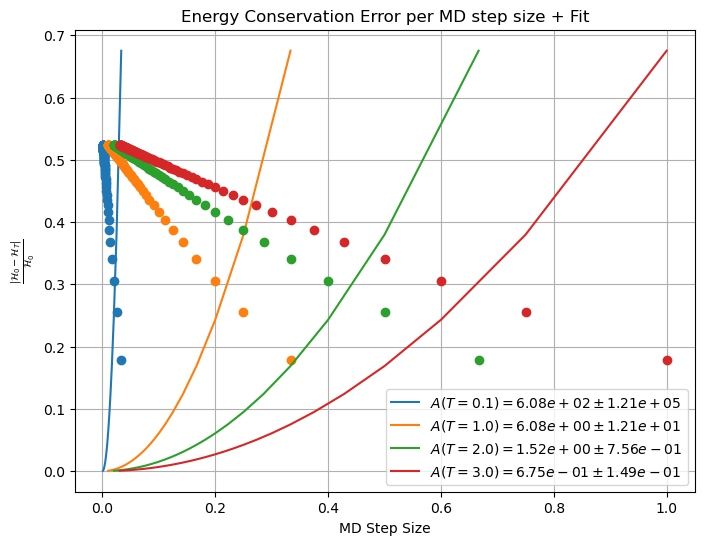

In [18]:
def f (x,A):
    return A*x*x

fig,ax = plt.subplots(1,1,figsize = (8,6))

# The first 3 points i.e. MD_steps = 1,2,3 can be neglect as they will not five a good accuracy regardless.
start_fit = 3

for T in MD_traj_lengths:
    print(f"T = {T}")
    col = next(ax._get_lines.prop_cycler)['color']
    popt,pcov = curve_fit(f,T/np.arange(start_fit,100),errors_energy_conservation[start_fit-1:,1],p0=1)
    fit = f (T/np.arange(start_fit,100),*popt)
    ax.plot(T/np.arange(start_fit,100),fit,color=col,label=rf"$A(T = {T}) = {popt[0]:.2e} \pm {pcov[0][0]:.2e}$")
    ax.plot(T/np.arange(start_fit,100),errors_energy_conservation[start_fit-1:,1],'o',color=col)

plt.legend()
plt.grid()
plt.title("Energy Conservation Error per MD step size + Fit")
plt.xlabel("MD Step Size")
plt.ylabel(r"$\frac{\left\vert \mathcal{H}_{0} - \mathcal{H}_{T}\right\vert}{\mathcal{H}_{0}}$")
plt.show()

As can be seen from the plot we do not see the hoped $\delta t^2$ behaviour that you would expect from a leapfrog algorithm. Something probably went wrong in the implementation.